# **Data Cleaning**
Libraries Used: Numpy, Matplotlib, Pandas, Seaborn

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set_style("whitegrid")
mpl.rcParams['figure.figsize'] = (20,5)

Import CSV file of unsolved/solved crimes in the USA.

In [2]:
crimes = pd.read_csv('/Users/cristina/Desktop/DAI/Capstone/unsolved_solvedcrimes.csv', low_memory=False)

In [3]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 827219 entries, 0 to 827218
Data columns (total 31 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            827219 non-null  object 
 1   CNTYFIPS      827219 non-null  object 
 2   Ori           827219 non-null  object 
 3   State         827219 non-null  object 
 4   Agency        827219 non-null  object 
 5   Agentype      827219 non-null  object 
 6   Source        827219 non-null  object 
 7   Solved        827219 non-null  object 
 8   Year          827219 non-null  int64  
 9   StateName     22468 non-null   object 
 10  Month         827219 non-null  object 
 11  Incident      827219 non-null  int64  
 12  ActionType    827219 non-null  object 
 13  Homicide      827219 non-null  object 
 14  Situation     827219 non-null  object 
 15  VicAge        827219 non-null  int64  
 16  VicSex        827219 non-null  object 
 17  VicRace       827219 non-null  object 
 18  VicE

* The **FileDate** columns must be changed from an float64 to date.

* Many values are missing for **StateName** and **Subcircum** columns and will be dropped, along with VicEthnic, Off Ethinic, Ori.

In [4]:
crimes

,ID,CNTYFIPS,Ori,State,Agency,Agentype,Source,Solved,Year,StateName,...,OffRace,OffEthnic,Weapon,Relationship,Circumstance,Subcircum,VicCount,OffCount,FileDate,MSA
0,197609001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,No,1976,NaN,...,Unknown,Unknown or not reported,Other or type unknown,Relationship not determined,Other,NaN,0,0,30180.0,"Montgomery, AL"
1,197701001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,NaN,0,0,30180.0,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,White,Unknown or not reported,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,NaN,0,1,30180.0,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",AL00401,Alabama,Prattville,Municipal police,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Shotgun,Husband,Other arguments,NaN,0,0,30180.0,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",AL00400,Alabama,Autauga County,Sheriff,FBI,Yes,1977,NaN,...,Black,Unknown or not reported,Knife or cutting instrument,Acquaintance,Circumstances undetermined,NaN,0,0,30180.0,"Montgomery, AL"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
827214,198210001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1982,NaN,...,White,Not of Hispanic origin,"Personal weapons, includes beating",Girlfriend,Other arguments,NaN,0,0,121482.0,Rural Wyoming
827215,198701001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1987,NaN,...,White,Unknown or not reported,Asphyxiation - includes death by gas,Son,All other manslaughter by negligence,NaN,0,0,61987.0,Rural Wyoming
827216,199412001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,1994,NaN,...,Asian,Unknown or not reported,Other or type unknown,Acquaintance,All other manslaughter by negligence,NaN,0,0,22795.0,Rural Wyoming
827217,200405001WY02300,"Weston, WY",WY02300,Wyoming,Weston County,Sheriff,FBI,Yes,2004,NaN,...,White,Unknown or not reported,Other or type unknown,Girlfriend,Other arguments,NaN,0,0,90704.0,Rural Wyoming


In [5]:
crimes.drop(['StateName', 'Subcircum', 'VicEthnic', 'OffEthnic', 'Ori'], axis=1, inplace=True)
crimes.head(10)

,ID,CNTYFIPS,State,Agency,Agentype,Source,Solved,Year,Month,Incident,...,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,VicCount,OffCount,FileDate,MSA
0,197609001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,No,1976,September,1,...,999,Unknown,Unknown,Other or type unknown,Relationship not determined,Other,0,0,30180.0,"Montgomery, AL"
1,197701001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1977,January,1,...,62,Male,Black,Other or type unknown,Acquaintance,Brawl due to influence of alcohol,0,0,30180.0,"Montgomery, AL"
2,197703001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1977,March,1,...,52,Male,White,"Handgun - pistol, revolver, etc",Acquaintance,Other arguments,0,1,30180.0,"Montgomery, AL"
3,197703001AL00401,"Autauga, AL",Alabama,Prattville,Municipal police,FBI,Yes,1977,March,1,...,22,Female,Black,Shotgun,Husband,Other arguments,0,0,30180.0,"Montgomery, AL"
4,197708001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1977,August,1,...,21,Male,Black,Knife or cutting instrument,Acquaintance,Circumstances undetermined,0,0,30180.0,"Montgomery, AL"
5,197710001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1977,October,1,...,80,Male,Black,Shotgun,Stranger,Robbery,0,0,30180.0,"Montgomery, AL"
6,197805001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1978,May,1,...,54,Female,Black,Knife or cutting instrument,Husband,Circumstances undetermined,0,2,30180.0,"Montgomery, AL"
7,197812001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,Yes,1978,December,1,...,26,Male,White,"Blunt object - hammer, club, etc",Acquaintance,Other,0,0,30180.0,"Montgomery, AL"
8,197902001AL00400,"Autauga, AL",Alabama,Autauga County,Sheriff,FBI,No,1979,February,1,...,999,Unknown,Unknown,Other or type unknown,Relationship not determined,Circumstances undetermined,0,0,30180.0,"Montgomery, AL"
9,197912001AL00401,"Autauga, AL",Alabama,Prattville,Municipal police,FBI,Yes,1979,December,1,...,24,Female,Black,Knife or cutting instrument,Common-law husband,Other arguments,0,0,30180.0,"Montgomery, AL"


Confirm expected shape and columns

In [6]:
crimes.shape

(827219, 26)

In [7]:
crimes.columns

Index(['ID', 'CNTYFIPS', 'State', 'Agency', 'Agentype', 'Source', 'Solved',
       'Year', 'Month', 'Incident', 'ActionType', 'Homicide', 'Situation',
       'VicAge', 'VicSex', 'VicRace', 'OffAge', 'OffSex', 'OffRace', 'Weapon',
       'Relationship', 'Circumstance', 'VicCount', 'OffCount', 'FileDate',
       'MSA'],
      dtype='object')

Check all columns for expected counts

In [8]:
pd.set_option("display.max_columns", None)
crimes.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,827219,789664,197702001NY05904,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CNTYFIPS,827219,3065,"Los Angeles, CA",53346,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State,827219,52,California,122841,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agency,827219,9687,New York,46455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Agentype,827219,8,Municipal police,641556,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Source,827219,2,FBI,793855,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Solved,827219,2,Yes,583230,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,827219.0,NaN,NaN,NaN,1996.99104,13.008957,1976.0,1986.0,1996.0,2008.0,2020.0
Month,827219,12,July,75861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Incident,827219.0,NaN,NaN,NaN,28.947475,110.180594,0.0,1.0,2.0,10.0,999.0


In [9]:
crimes['State'].value_counts()

California              122841
Texas                    79366
New York                 60336
Florida                  48740
Illinois                 36370
Michigan                 36174
Pennsylvania             31169
Georgia                  27121
North Carolina           26475
Ohio                     25984
Louisiana                25726
Maryland                 21962
Virginia                 20369
Missouri                 20342
Tennessee                19935
New Jersey               17886
Alabama                  16796
Arizona                  16364
South Carolina           15878
Indiana                  15200
Oklahoma                 11547
Washington                9972
Kentucky                  9673
Arkansas                  9200
District of Columbia      8892
Colorado                  8846
Wisconsin                 8473
Mississippi               8452
Massachusetts             7705
Nevada                    7318
Connecticut               6025
New Mexico                5571
Oregon  

It appears that District of Columbia is treated as a state and an outlier PAPSP8 (keep DC, delete PAP)

In [10]:
crimes.drop(crimes.index[crimes['State'] =='PAPSP8'], inplace=True)

In [11]:
crimes['State'].value_counts()

California              122841
Texas                    79366
New York                 60336
Florida                  48740
Illinois                 36370
Michigan                 36174
Pennsylvania             31169
Georgia                  27121
North Carolina           26475
Ohio                     25984
Louisiana                25726
Maryland                 21962
Virginia                 20369
Missouri                 20342
Tennessee                19935
New Jersey               17886
Alabama                  16796
Arizona                  16364
South Carolina           15878
Indiana                  15200
Oklahoma                 11547
Washington                9972
Kentucky                  9673
Arkansas                  9200
District of Columbia      8892
Colorado                  8846
Wisconsin                 8473
Mississippi               8452
Massachusetts             7705
Nevada                    7318
Connecticut               6025
New Mexico                5571
Oregon  

Check the other columns are consistently entered

In [12]:
crimes.VicAge.head()

0    30
1    65
2    48
3    27
4    17
Name: VicAge, dtype: int64

In [13]:
crimes.OffSex.unique()

array(['Unknown', 'Male', 'Female'], dtype=object)

In [14]:
crimes.VicCount.unique()

array([ 0,  1,  2,  3,  5,  4,  7,  6,  9,  8, 10, 11, 21])

In [15]:
crimes.Agency.sort_values().unique().tolist()

['24th Jud Cir Drug & Vctf',
 'Abbeville',
 'Abbeville County',
 'Aberdeen',
 'Aberdeen Township',
 'Abernathy',
 'Abilene',
 'Abingdon',
 'Abington',
 'Abington Township',
 'Abita Springs',
 'Absecon',
 'Acadia County',
 'Accomack County',
 'Achille Police Department',
 'Ackerman',
 'Acoma Tribal',
 'Acoma Tribal Police Department',
 'Acton',
 'Acworth',
 'Ada',
 'Ada County',
 'Adair County',
 'Adairsville',
 'Adams',
 'Adams County',
 'Adams Township',
 'Adamsville',
 'Addis',
 'Addison',
 'Addison Town and Village',
 'Adel',
 'Adelanto',
 'Adrian',
 'Adrian Township',
 'Advance',
 'Afton',
 'Agawam',
 'Agoura Hills',
 'Ahoskie',
 'Aiken',
 'Aiken County',
 'Airway Heights',
 'Aitkin County',
 'Akron',
 'Akron-Fairgrove',
 'Ala Law Enforce Agency',
 'Alabama Department of Mental Health',
 'Alabaster',
 'Alachua',
 'Alachua County',
 'Alamance County',
 'Alameda',
 'Alameda County',
 'Alameda State Police',
 'Alamo',
 'Alamo Community College District',
 'Alamo Heights',
 'Alamogordo

In [16]:
crimes.FileDate.unique()

array([ 30180.,  30681.,  82581., ...,  91516., 120816., 101012.])

FileDate needs to be modified to a proper date format:
* First, delete any nulls and convert FileDate from float64 to String
* Second, any 5 digit dates (examples: 30599), add a leading zero
* All dates should then be divided by every two digits and seperated by a backslash

In [17]:
crimes.isnull().sum()

ID                 0
CNTYFIPS           0
State              0
Agency             0
Agentype           0
Source             0
Solved             0
Year               0
Month              0
Incident           0
ActionType         0
Homicide           0
Situation          0
VicAge             0
VicSex             0
VicRace            0
OffAge             0
OffSex             0
OffRace            0
Weapon             0
Relationship       0
Circumstance       0
VicCount           0
OffCount           0
FileDate        2510
MSA                0
dtype: int64

In [18]:
crimes.dropna(inplace=True)

In [19]:
crimes['FileDate'] = crimes['FileDate'].astype(str)

In [20]:
def float_to_date(row):
    
    try:
        string = row['FileDate'].replace('.0', '')
        if len(string) < 6:
            string = '0' + string

        date = pd.to_datetime(f'{string[:2]}/{string[2:4]}/{string[4:]}')
        return date
    except:
        print(row['FileDate'])
    


crimes['filingdate'] = crimes.apply(float_to_date, axis=1)

In [21]:
crimes.drop(['FileDate'],axis=1, inplace=True)

In [22]:
crimes['filingdate']

0        1980-03-01
1        1980-03-01
2        1980-03-01
3        1980-03-01
4        1980-03-01
            ...    
827214   1982-12-14
827215   1987-06-19
827216   1995-02-27
827217   2004-09-07
827218   2011-08-17
Name: filingdate, Length: 824708, dtype: datetime64[ns]

Let's look at the Year and Age columns.

In [24]:
crimes['Year'].value_counts()

1993    24337
1992    23793
1994    23246
1980    23092
1991    22657
1979    21698
1990    21246
1981    21208
1995    21194
2020    21179
1982    20544
1986    20125
1989    19868
1983    19653
1978    19523
1996    18996
1977    18844
1987    18783
1988    18779
1985    18386
1984    18093
2016    18022
1997    17830
1976    17619
2017    17480
2007    17327
2006    17294
2005    16852
2019    16836
2003    16532
2008    16430
2015    16358
2002    16287
2004    16246
1998    16089
2018    16063
2009    15857
2001    15821
2012    15390
2010    15133
2011    15119
2013    14841
2014    14702
2000    14692
1999    14644
Name: Year, dtype: int64

In [25]:
crimes.groupby(['VicAge']).count()

,ID,CNTYFIPS,State,Agency,Agentype,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicSex,VicRace,OffAge,OffSex,OffRace,Weapon,Relationship,Circumstance,VicCount,OffCount,MSA,filingdate
VicAge,,,,,,,,,,,,,,,,,,,,,,,,,
0,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405,10405
1,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754,6754
2,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810,4810
3,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023,3023
4,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145,2145
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
97,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55,55
98,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36,36


The data dictionary indicates that an age of 999 is an unknown age. Let's replace with 'unknown. Let's also check OffAge.

In [26]:
crimes['VicAge'].replace([999], 'unknown', inplace=True)

In [27]:
crimes.groupby(['OffAge']).count()

,ID,CNTYFIPS,State,Agency,Agentype,Source,Solved,Year,Month,Incident,ActionType,Homicide,Situation,VicAge,VicSex,VicRace,OffSex,OffRace,Weapon,Relationship,Circumstance,VicCount,OffCount,MSA,filingdate
OffAge,,,,,,,,,,,,,,,,,,,,,,,,,
1,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75,75
2,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
3,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31,31
4,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40,40
5,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10
97,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
98,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10,10


In [28]:
crimes['OffAge'].replace([999], 'unknown', inplace=True)

Okay, now we make all columns lower case and change some of the column names to make them easy to read.

In [29]:
crimes.columns = [col.lower() for col in crimes]

In [30]:
crimes.columns

Index(['id', 'cntyfips', 'state', 'agency', 'agentype', 'source', 'solved',
       'year', 'month', 'incident', 'actiontype', 'homicide', 'situation',
       'vicage', 'vicsex', 'vicrace', 'offage', 'offsex', 'offrace', 'weapon',
       'relationship', 'circumstance', 'viccount', 'offcount', 'msa',
       'filingdate'],
      dtype='object')

In [31]:
crimes.rename(columns = {'ori':'originating_agency', 'agency':'reporting_agency', 'agentype':'agency_type', 'source':'data_source', 'vicage':'victim_age', 'vicsex':'victim_sex', 'vicrace':'victim_race', 'vicethnic':'victim_ethnicity', 'offage':'offender_age'}, inplace=True)

In [32]:
crimes.rename(columns={'offsex':'offender_sex', 'offrace':'offender_race', 'offethnic':'offender_ethnicity', 'weapon':'weapon_used', 'viccount':'victim_count', 'offcount':'offender_count', 'fstate':'reporting_state'}, inplace=True)

Check our work...

In [33]:
crimes.columns

Index(['id', 'cntyfips', 'state', 'reporting_agency', 'agency_type',
       'data_source', 'solved', 'year', 'month', 'incident', 'actiontype',
       'homicide', 'situation', 'victim_age', 'victim_sex', 'victim_race',
       'offender_age', 'offender_sex', 'offender_race', 'weapon_used',
       'relationship', 'circumstance', 'victim_count', 'offender_count', 'msa',
       'filingdate'],
      dtype='object')

Let's double check our other columns.

In [34]:
crimes['relationship'].value_counts().head(10)

Relationship not determined    318530
Acquaintance                   159109
Stranger                       121848
Other - known to victim         37941
Wife                            30081
Friend                          28314
Girlfriend                      21141
Son                             12897
Other family                    12584
Husband                         12246
Name: relationship, dtype: int64

Let's change the relationship column from an int64 to an object.

In [35]:
crimes = crimes.astype({'relationship':object})

In [36]:
crimes.dtypes

id                          object
cntyfips                    object
state                       object
reporting_agency            object
agency_type                 object
data_source                 object
solved                      object
year                         int64
month                       object
incident                     int64
actiontype                  object
homicide                    object
situation                   object
victim_age                  object
victim_sex                  object
victim_race                 object
offender_age                object
offender_sex                object
offender_race               object
weapon_used                 object
relationship                object
circumstance                object
victim_count                 int64
offender_count               int64
msa                         object
filingdate          datetime64[ns]
dtype: object

In [41]:
crimes.incident.unique()

array([  1,   2, 936, 881,  69,  37, 624,  70, 318,  44, 782, 937, 760,
       339,  32, 125, 240, 279, 280, 278, 372, 573, 511,   3,   4, 938,
       403, 182, 939, 145, 477, 559, 251, 509, 436, 437, 126, 212, 226,
       617, 793, 438, 489, 761, 206, 116, 179,  81, 273,  15,   9, 852,
        71, 940, 635, 612, 869, 618,  72,  16,  74, 490, 577, 289,  73,
       340, 357, 459,  45,  46, 404, 405, 941, 743,  25, 943, 722, 812,
       942,  75,  76, 491, 546, 342, 341, 195,  78,  77, 480, 520, 183,
       186, 720, 723, 478, 771,  82, 712, 184, 185, 636, 637, 652, 619,
       620, 408, 187, 658, 661, 481, 406, 638, 581,  79,  80, 407, 944,
       945, 260, 295, 296,   5,   6,   7,   8,  10,  11, 813,  89,  92,
       266, 331, 333,  33, 578,  87,  93,  94, 128, 946, 196,  86, 410,
       411, 882, 794, 154, 409, 883, 203, 190,  95, 127, 539, 795, 275,
       194, 779,  96, 129,  97,  85,  83, 193, 885,  90, 192, 189, 884,
       845, 482,  88,  84, 188,  91, 191, 838, 241, 255, 256, 25

In [44]:
crimes.relationship.unique()

array(['Relationship not determined', 'Acquaintance', 'Husband',
       'Stranger', 'Common-law husband', 'In-law', 'Friend', 'Son',
       'Daughter', 'Wife', 'Ex-wife', 'Boyfriend', 'Neighbor',
       'Common-law wife', 'Other - known to victim', 'Mother', 'Brother',
       'Stepson', 'Father', 'Other family', 'Stepfather', 'Ex-husband',
       'Girlfriend', 'Employee', 'Stepmother', 'Sister', 'Stepdaughter',
       'Employer', 'Homosexual relationship'], dtype=object)

# **Some Data Exploration**
Preliminary exploration before moving onto Tableau

In [45]:
crimes['victim_age'].value_counts()

22    29292
25    29244
21    28892
20    28758
23    28717
      ...  
99      147
95      114
96       55
97       55
98       36
Name: victim_age, Length: 101, dtype: int64

What is the most affected age of victims?

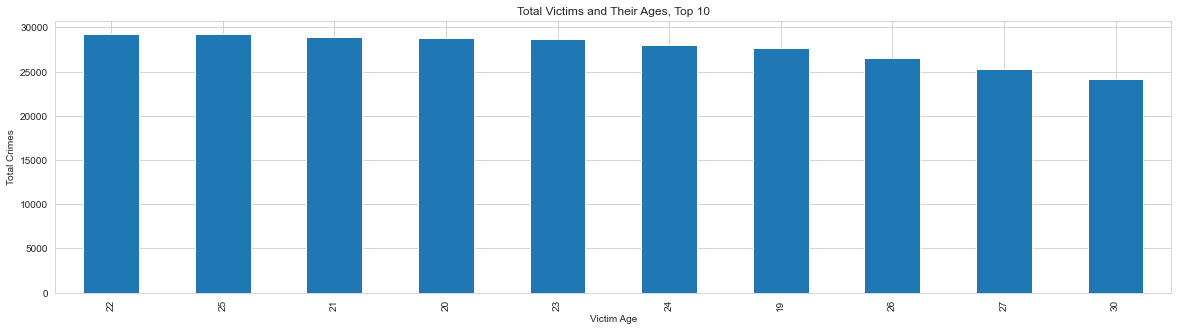

In [52]:
crimes["victim_age"].value_counts().head(10).plot(kind="bar")
plt.title("Total Victims and Their Ages, Top 10")
plt.xlabel("Victim Age")
plt.ylabel("Total Crimes")
plt.show()




In [50]:
crimes['relationship'].value_counts()

Relationship not determined    318530
Acquaintance                   159109
Stranger                       121848
Other - known to victim         37941
Wife                            30081
Friend                          28314
Girlfriend                      21141
Son                             12897
Other family                    12584
Husband                         12246
Boyfriend                        9602
Daughter                         9362
Neighbor                         8409
Brother                          7165
Father                           5972
Mother                           5811
In-law                           4950
Common-law wife                  3342
Common-law husband               2721
Ex-wife                          2519
Stepfather                       1860
Sister                           1789
Homosexual relationship          1729
Stepson                          1569
Ex-husband                        914
Stepdaughter                      910
Employer    

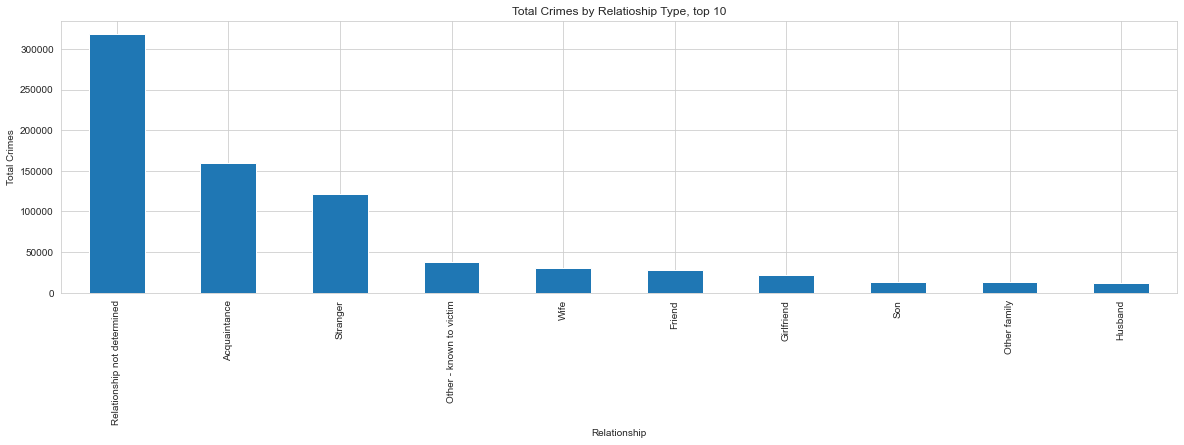

In [53]:
crimes['relationship'].value_counts().head(10).plot(kind="bar")
plt.title("Total Crimes by Relatioship Type, top 10")
plt.xlabel("Relationship")
plt.ylabel("Total Crimes")
plt.show()



In [54]:
crimes['victim_sex'].value_counts()

Male       639051
Female     184260
Unknown      1397
Name: victim_sex, dtype: int64

In [55]:
crimes['offender_sex'].value_counts()

Male       515751
Unknown    243601
Female      65356
Name: offender_sex, dtype: int64

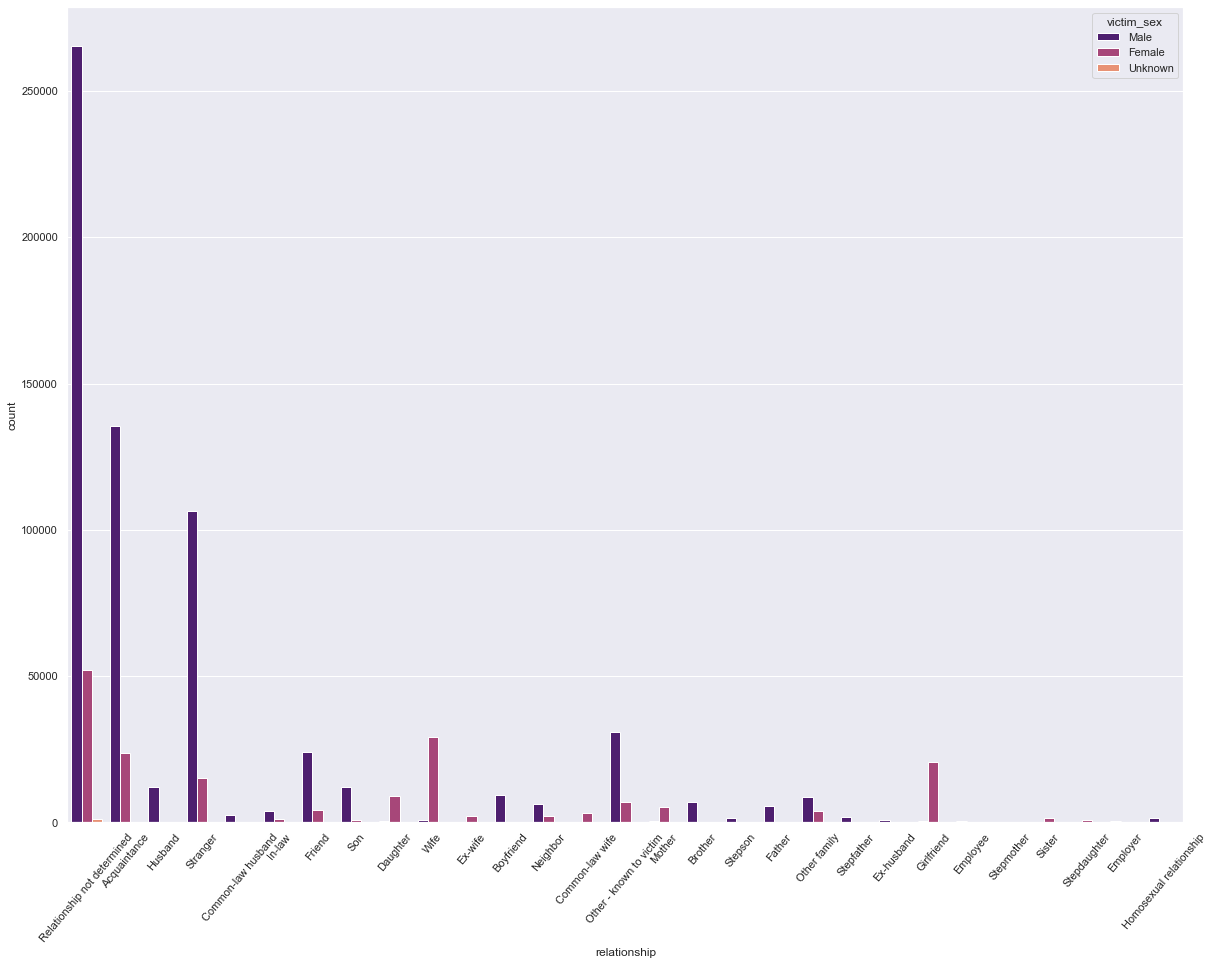

In [75]:

relation = sns.countplot(x = 'relationship', hue = 'victim_sex', data = crimes, palette = 'magma')
relation.set_xticklabels(relation.get_xticklabels(),rotation = 50)
sns.set(rc = {'figure.figsize':(20,20)})

In [65]:
crimes['month'].value_counts()

July         75623
August       74565
December     71285
September    70099
October      69648
June         69501
May          69208
January      67903
March        66155
April        65733
November     65446
February     59542
Name: month, dtype: int64

In [36]:
crimes['weapon_used'].value_counts()

Handgun - pistol, revolver, etc         404196
Knife or cutting instrument             119912
Firearm, type not stated                 74381
Personal weapons, includes beating       47142
Other or type unknown                    43412
Shotgun                                  39330
Blunt object - hammer, club, etc         36116
Rifle                                    30701
Strangulation - hanging                  10100
Fire                                      7890
Asphyxiation - includes death by gas      5041
Other gun                                 3218
Narcotics or drugs, sleeping pills        2792
Drowning                                  1511
Explosives                                 630
Poison - does not include gas              586
Pushed or thrown out window                261
Name: weapon_used, dtype: int64

In [37]:
crimes['circumstance'].value_counts()

Circumstances undetermined              220836
Other arguments                         212533
Other                                   106983
Robbery                                  61325
Narcotic drug laws                       30724
Other - not specified                    29649
Juvenile gang killings                   25072
Felon killed by police                   18119
Brawl due to influence of alcohol        16307
Argument over money or property          15882
Felon killed by private citizen          14365
All suspected felony type                13686
Lovers triangle                          12582
All other manslaughter by negligence      7341
Burglary                                  6652
Gangland killings                         5958
Brawl due to influence of narcotics       5237
Arson                                     4855
Rape                                      4233
Other negligent handling of gun           4169
Children playing with gun                 1524
Other sex off

In [38]:
crimes['state'].value_counts()

California              122841
Texas                    79366
New York                 60336
Florida                  48740
Illinois                 36370
Michigan                 36174
Pennsylvania             31169
Georgia                  27121
North Carolina           26475
Ohio                     25984
Louisiana                25726
Maryland                 21962
Virginia                 20369
Missouri                 20342
Tennessee                19935
New Jersey               17886
Alabama                  16796
Arizona                  16364
South Carolina           15878
Indiana                  15200
Oklahoma                 11547
Washington                9972
Kentucky                  9673
Arkansas                  9200
District of Columbia      8892
Colorado                  8846
Wisconsin                 8473
Mississippi               8452
Massachusetts             7705
Nevada                    7318
Connecticut               6025
New Mexico                5571
Oregon  

Descriptive Statistics

Time to export to take over to Tableau

In [76]:
crimes.to_csv(r'/Users/cristina/Desktop/DAI/Capstone\crimes_cleaned.csv', index = False)

## The End
In preliminary findings, most frequent crime victims were:
* Age 22
* Relationships were not determined
* Crimes occur most frequently in July
* Hanguns most used
* Most crimes occuring in California, Texas, and New York

More to come!